## 패키지 설정

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

## plot 환경설정

In [133]:
font_location = "c:/Windows/fonts/malgun.ttf"
font_name = matplotlib.font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams['figure.figsize'] = [15, 10]
matplotlib.rcParams['axes.grid'] = True

# 2019, 2020 관객 수 및 매출액 비교

## csv에서 데이터 로드

In [141]:
movie2019 = pd.read_csv("2019_관객수_및_매출액_월별.csv")
movie2020 = pd.read_csv("2020_관객수_및_매출액_월별.csv")
movie_year = pd.read_csv("연도별_관객수_및_매출액.csv")

In [145]:
def convert_numeric(df) :
    for col in df.columns :
        df[col] = df[col].str.replace(pat=',', repl='', regex=False)
        df[col] = pd.to_numeric(df[col])
        
    return df

In [143]:
movie2019 = movie2019[0:10]
movie2019

,년월,한국영화개봉편수,한국영화상영편수,한국영화매출액,한국영화관객수,한국영화점유율,외국영화개봉편수,외국영화상영편수,외국영화매출액,외국영화관객수,외국영화점유율,전체영화개봉편수,전체영화상영편수,전체영화매출액,전체영화관객수
0,2019-01,46,130,"99,614,450,357","11,950,823",65.9%,101,239,"51,547,027,839","6,171,620",34.1%,147,369,"151,161,478,196","18,122,443"
1,2019-02,33,108,"146,336,183,090","17,228,752",77.3%,81,209,"43,654,624,880","5,048,981",22.7%,114,317,"189,990,807,970","22,277,733"
2,2019-03,46,134,"53,449,954,665","6,267,605",42.7%,96,239,"73,109,062,784","8,404,088",57.3%,142,373,"126,559,017,449","14,671,693"
3,2019-04,51,144,"23,535,909,622","2,871,972",21.5%,104,292,"89,648,754,770","10,466,990",78.5%,155,436,"113,184,664,392","13,338,962"
4,2019-05,59,164,"72,430,147,833","8,614,235",47.7%,93,293,"82,132,857,124","9,448,222",52.3%,152,457,"154,563,004,957","18,062,457"
5,2019-06,44,140,"84,708,194,720","9,943,592",43.5%,109,315,"110,529,603,988","12,901,987",56.5%,153,455,"195,237,798,708","22,845,579"
6,2019-07,54,139,"25,376,188,033","3,340,740",15.2%,104,284,"158,725,114,684","18,575,725",84.8%,158,423,"184,101,302,717","21,916,465"
7,2019-08,70,170,"151,959,834,460","17,981,401",72.5%,111,265,"56,998,338,584","6,804,720",27.5%,181,435,"208,958,173,044","24,786,121"
8,2019-09,61,179,"101,553,036,040","11,964,689",81.2%,105,245,"22,892,226,668","2,768,953",18.8%,166,424,"124,445,262,708","14,733,642"
9,2019-10,76,212,"56,279,424,550","6,800,894",45.8%,139,288,"67,475,291,150","8,057,489",54.2%,215,500,"123,754,715,700","14,858,383"


In [144]:
movie2020 = movie2020[0:10]
movie2020

,년월,한국영화개봉편수,한국영화상영편수,한국영화매출액,한국영화관객수,한국영화점유율,외국영화개봉편수,외국영화상영편수,외국영화매출액,외국영화관객수,외국영화점유율,전체영화개봉편수,전체영화상영편수,전체영화매출액,전체영화관객수
0,2020-01,59,139,"99,273,272,998","11,588,401",68.8%,106,264,"44,407,788,432","5,255,294",31.2%,165,403,"143,681,061,430","16,843,695"
1,2020-02,59,141,"41,728,302,280","4,942,629",67.0%,91,227,"20,575,345,700","2,429,741",33.0%,150,368,"62,303,647,980","7,372,370"
2,2020-03,51,87,"2,526,011,700","307,866",16.8%,103,257,"12,626,707,250","1,526,856",83.2%,154,344,"15,152,718,950","1,834,722"
3,2020-04,71,128,"1,120,062,760","146,076",15.0%,109,300,"6,395,603,280","826,496",85.0%,180,428,"7,515,666,040","972,572"
4,2020-05,65,147,"1,742,834,320","220,161",14.4%,92,284,"10,650,880,720","1,306,075",85.6%,157,431,"12,393,715,040","1,526,236"
5,2020-06,59,145,"24,208,838,380","2,786,453",72.1%,77,270,"8,551,295,420","1,078,080",27.9%,136,415,"32,760,133,800","3,864,533"
6,2020-07,69,159,"39,977,714,060","4,691,821",83.5%,101,320,"7,261,970,590","926,856",16.5%,170,479,"47,239,684,650","5,618,677"
7,2020-08,56,152,"64,774,507,400","7,377,415",83.5%,88,271,"12,438,620,639","1,457,187",16.5%,144,423,"77,213,128,039","8,834,602"
8,2020-09,72,169,"11,534,790,912","1,359,287",45.5%,86,238,"14,497,227,460","1,629,395",54.5%,158,407,"26,032,018,372","2,988,682"
9,2020-10,90,175,"32,399,365,140","3,561,398",76.9%,80,297,"9,128,144,250","1,072,082",23.1%,170,472,"41,527,509,390","4,633,480"


In [142]:
movie_year = movie_year[7:17]
movie_year

,년월,한국영화개봉편수,한국영화상영편수,한국영화매출액,한국영화관객수,한국영화점유율,외국영화개봉편수,외국영화상영편수,외국영화매출액,외국영화관객수,외국영화점유율,전체영화개봉편수,전체영화상영편수,전체영화매출액,전체영화관객수
7,2011,152,334,"613,722,968,100","82,868,189",51.9%,290,609,"622,076,496,100","76,856,276",48.1%,442,943,"1,235,799,464,200","159,724,465"
8,2012,176,389,"838,238,171,234","114,911,591",59.0%,465,842,"616,902,183,201","79,978,996",41.0%,641,"1,231","1,455,140,354,435","194,890,587"
9,2013,183,491,"909,932,880,105","127,291,781",59.7%,724,"1,184","641,419,104,616","86,059,249",40.3%,907,"1,675","1,551,351,984,721","213,351,030"
10,2014,217,515,"820,639,569,302","107,703,922",50.1%,878,"1,437","843,592,979,858","107,365,036",49.9%,"1,095","1,952","1,664,232,549,160","215,068,958"
11,2015,257,584,"879,658,901,660","112,941,882",52.0%,946,"1,556","835,842,670,018","104,357,641",48.0%,"1,203","2,140","1,715,501,571,678","217,299,523"
12,2016,337,701,"927,865,027,723","116,555,889",53.7%,"1,237","1,911","815,329,396,647","100,470,293",46.3%,"1,574","2,612","1,743,194,424,370","217,026,182"
13,2017,495,886,"902,667,356,338","113,907,067",51.8%,"1,272","2,059","853,910,494,775","105,969,160",48.2%,"1,767","2,945","1,756,577,851,113","219,876,227"
14,2018,661,"1,089","912,746,432,308","110,149,287",50.9%,"1,210","2,084","901,217,376,930","106,235,982",49.1%,"1,871","3,173","1,813,963,809,238","216,385,269"
15,2019,697,"1,110","970,793,408,451","115,621,862",51.0%,"1,246","1,956","943,195,671,617","111,056,915",49.0%,"1,943","3,066","1,913,989,080,068","226,678,777"
16,2020,676,959,"340,141,946,680","39,262,407",68.7%,982,"1,674","149,918,287,201","17,911,823",31.3%,"1,658","2,633","490,060,233,881","57,174,230"


## 최근 10년 간 영화 매출액 및 관객 수

In [147]:
movie_recent10y = movie_year[['년월', '한국영화매출액', '한국영화관객수', '전체영화매출액', '전체영화관객수']].set_index('년월')
movie_recent10y = convert_numeric(movie_recent10y)
movie_recent10y[['한국영화매출액', '전체영화매출액']] = movie_recent10y[['한국영화매출액', '전체영화매출액']] / 100000000
movie_recent10y[['한국영화관객수', '전체영화관객수']] = movie_recent10y[['한국영화관객수', '전체영화관객수']] / 1000000
movie_recent10y

,한국영화매출액,한국영화관객수,전체영화매출액,전체영화관객수
년월,,,,
2011,6137.229681,82.868189,12357.994642,159.724465
2012,8382.381712,114.911591,14551.403544,194.890587
2013,9099.328801,127.291781,15513.519847,213.351030
2014,8206.395693,107.703922,16642.325492,215.068958
2015,8796.589017,112.941882,17155.015717,217.299523
2016,9278.650277,116.555889,17431.944244,217.026182
2017,9026.673563,113.907067,17565.778511,219.876227
2018,9127.464323,110.149287,18139.638092,216.385269
2019,9707.934085,115.621862,19139.890801,226.678777


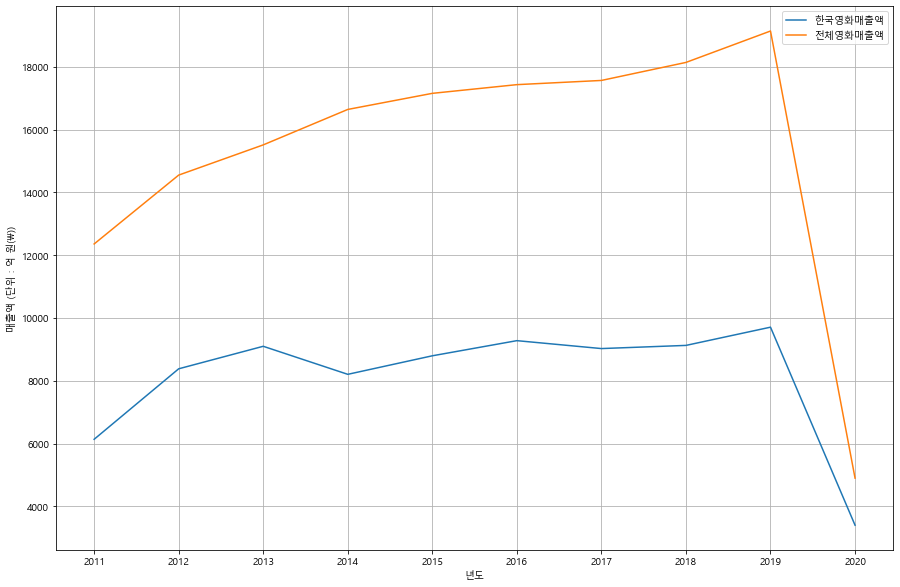

In [151]:
plt.plot(movie_recent10y['한국영화매출액'], label = '한국영화 매출액')
plt.plot(movie_recent10y['전체영화매출액'], label = '전체 매출액')
plt.ylabel('매출액 (단위 : 억 원(\))')
plt.xlabel('년도')
plt.legend()
plt.show()

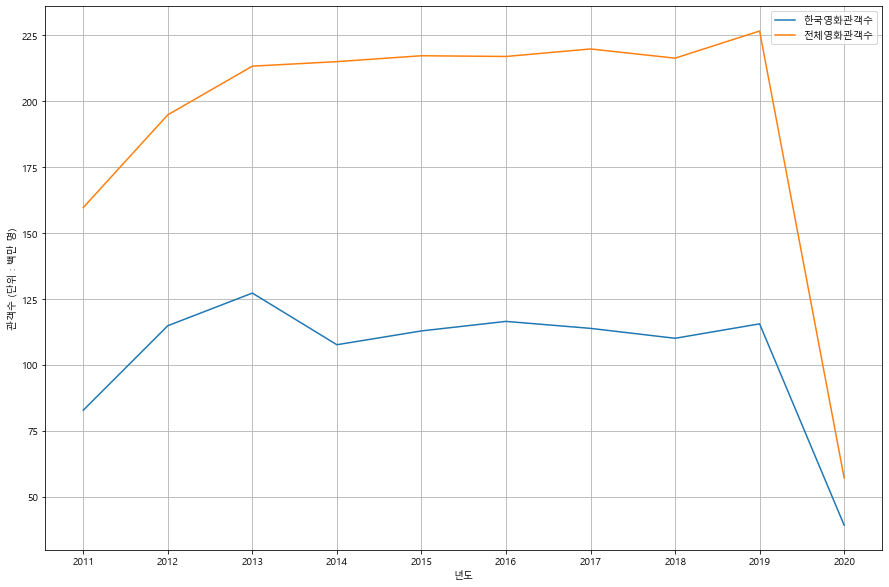

In [149]:
plt.plot(movie_recent10y['한국영화관객수'], label = '한국영화 관객 수')
plt.plot(movie_recent10y['전체영화관객수'], label = '전체 관객 수')
plt.ylabel('관객수 (단위 : 백만 명)')
plt.xlabel('년도')
plt.legend()
plt.show()

## 2019, 2020 동일 기간 비교

# 영화 관련 주가 2019, 2020 비교

## csv에서 데이터 로드

In [3]:
def load_stock_csv(csv_path) :
    df = pd.read_csv(csv_path)
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    df.drop(['Open', 'High', 'Low', 'Adj Close'], axis=1, inplace=True)
    
    return df

In [4]:
cgv_path = 'CJCGV_190101_201031.csv'
megabox_path = 'MEGABOX_190101_201031.csv'
ihq_path = 'IHQ_190101_201031.csv'

In [5]:
cgv = load_stock_csv(cgv_path)
cgv

,Date,Close,Volume
0,2019-01-02,40300.0,108612.0
1,2019-01-03,40400.0,86441.0
2,2019-01-04,39850.0,128704.0
3,2019-01-07,40600.0,91427.0
4,2019-01-08,40400.0,86558.0
...,...,...,...
447,2020-10-26,20350.0,190675.0
448,2020-10-27,20100.0,211581.0
449,2020-10-28,20600.0,140623.0
450,2020-10-29,20450.0,149115.0


In [6]:
megabox = load_stock_csv(megabox_path)
megabox

,Date,Close,Volume
0,2019-01-02,45600.0,226973.0
1,2019-01-03,46450.0,220751.0
2,2019-01-04,47400.0,119393.0
3,2019-01-07,51500.0,506776.0
4,2019-01-08,51300.0,216930.0
...,...,...,...
447,2020-10-26,24900.0,129528.0
448,2020-10-27,25700.0,85372.0
449,2020-10-28,25600.0,61261.0
450,2020-10-29,25100.0,64359.0


In [7]:
ihq = load_stock_csv(ihq_path)
ihq

,Date,Close,Volume
0,2019-01-02,1870.0,446070.0
1,2019-01-03,1860.0,465663.0
2,2019-01-04,1870.0,507436.0
3,2019-01-07,1915.0,669313.0
4,2019-01-08,1865.0,331427.0
...,...,...,...
447,2020-10-26,1335.0,308932.0
448,2020-10-27,1315.0,266629.0
449,2020-10-28,1350.0,206768.0
450,2020-10-29,1375.0,1481566.0


## 그래프 그리기용 DataFrame

In [8]:
stockDF = pd.DataFrame()
stockDF['Date'] = cgv['Date']
stockDF['CGV'] = cgv['Close']
stockDF['MEGABOX'] = megabox['Close']
stockDF['IHQ'] = ihq['Close']
stockDF = stockDF.set_index('Date')
stockDF

,CGV,MEGABOX,IHQ
Date,,,
2019-01-02,40300.0,45600.0,1870.0
2019-01-03,40400.0,46450.0,1860.0
2019-01-04,39850.0,47400.0,1870.0
2019-01-07,40600.0,51500.0,1915.0
2019-01-08,40400.0,51300.0,1865.0
...,...,...,...
2020-10-26,20350.0,24900.0,1335.0
2020-10-27,20100.0,25700.0,1315.0
2020-10-28,20600.0,25600.0,1350.0


## 주가 그래프

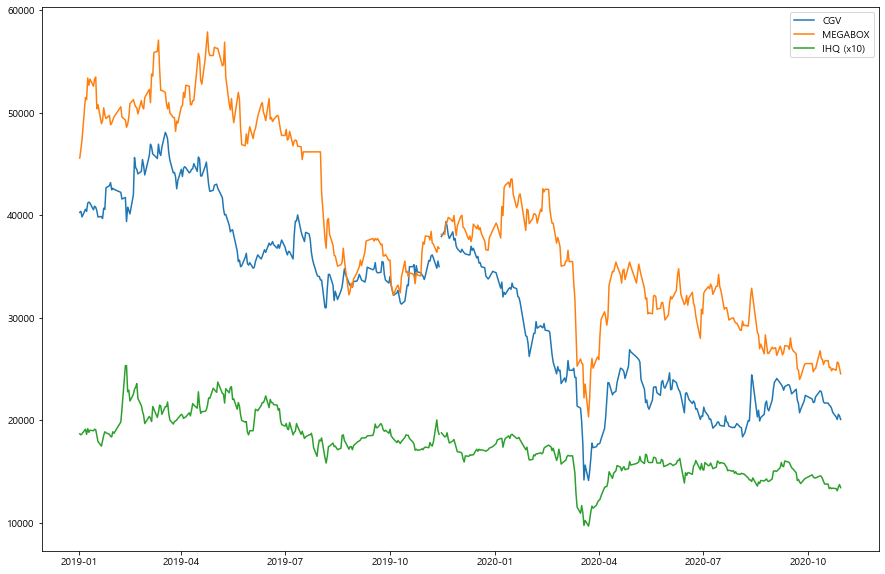

In [17]:
plt.plot(stockDF['CGV'], label='CGV')
plt.plot(stockDF['MEGABOX'], label='MEGABOX')
plt.plot(stockDF['IHQ'] * 10, label='IHQ (x10)')
plt.legend()
plt.show()

In [65]:
cgv2019 = cgv.query('Date > "2019-01-01" and Date < "2019-12-31"')
cgv2019 = cgv2019.drop('Date', axis=1)

cgv2020 = cgv.query('Date > "2020-01-01" and Date < "2020-12-31"')
cgv2020 = cgv2020.drop('Date', axis=1)
cgv2020 = cgv2020.reset_index(drop=True)

## CJ CGV 기준 동일 기간 비교

In [59]:
cgv_stock_graph = pd.DataFrame()
cgv_stock_graph['2019'] = cgv2019['Close']
cgv_stock_graph['2020'] = cgv2020['Close']
cgv_stock_graph

,2019,2020
0,40300.0,34400.0
1,40400.0,34000.0
2,39850.0,32900.0
3,40600.0,33500.0
4,40400.0,32050.0
...,...,...
241,34900.0,NaN
242,34100.0,NaN
243,33800.0,NaN
244,33950.0,NaN


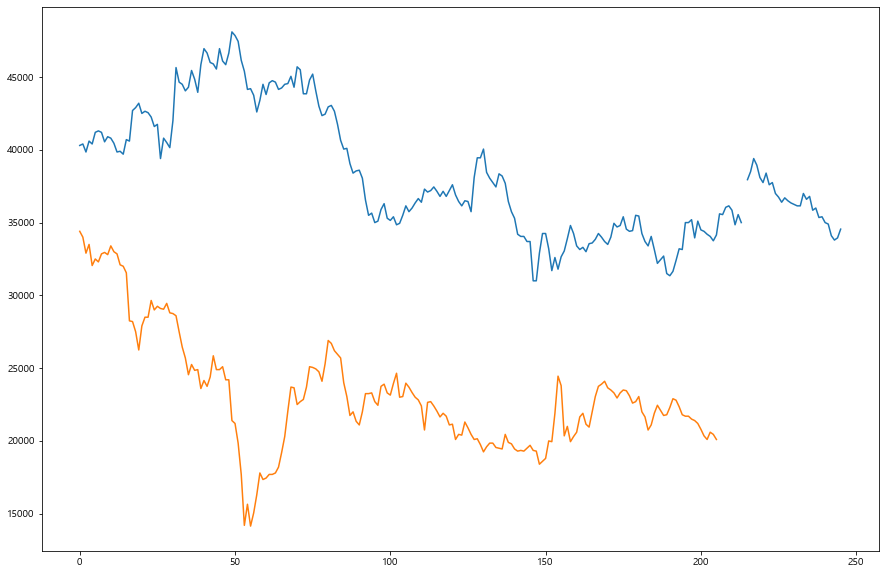

In [60]:
plt.plot(cgv_stock_graph)
plt.show()